In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import xlsxwriter


In [3]:
data = pd.read_excel('Exercise-Postmates.xlsx', sheetname='Data set')

In [29]:
#save this to a new excel file
data.to_excel('New.xlsx')

In [41]:
data.loc[:,'credit']=data.loc[:,'credit'].fillna(value=0)

In [42]:
data.loc[:,'total']=data.customer_price-data.courier_price+data.purchase_fee+data.purchase_price-data.credit

In [43]:
data.loc[:,'tip_percentage']=100*data.purchase_tip/(data.purchase_price+data.purchase_fee+data.customer_price)

In [44]:
data.loc[:,'deliverytime_mins']=data.total_delivery_time/60

In [45]:
data.loc[0]

market                                              Chicago
job_date_local_time                     2015-04-01 00:07:00
customer_price                                            5
courier_price                                             4
customer_uuid          180DB394-92B1-48FA-A41B-032E2D7705F7
courier_uuid           dc024490-dbb3-4f1f-ad93-bdf1653b9d48
job_uuid               7ee723fe-7557-42c0-bdd6-691bac632536
day_of_week                                               3
purchase_fee                                           1.09
rating_by_customer                                        5
purchase_price                                        12.07
purchase_tip                                              0
credit                                                    0
dropoff_km                                         0.479473
category                                                NaN
sub_category                                            NaN
total_delivery_time                     

In [12]:
data.loc[2:5]

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,category,sub_category,total_delivery_time,deliverytime_mins,tip_percentage
2,Chicago,2015-04-01 00:16:00,10.75,8.6,A57C5927-F608-44FA-B466-E5878454BD31,52639991-2e87-4ad6-a903-ede7d00afbc9,1674079d-2a23-4c2f-8aab-ddb274fce53e,3,2.89,5.0,32.09,4.57,NaN,3.985329,Restaurant,Bakery,2698,44.966667,9.993440
3,Chicago,2015-04-01 00:17:00,6.00,4.8,6551598E-8771-43A3-97E3-18F1EC473D63,19abeb3f-0f1e-4813-9837-6ec06e5b34ab,17fbcc32-0f03-4af8-b46d-04e8b888e083,3,3.79,5.0,42.09,0.00,NaN,1.291798,Restaurant,Pub,5432,90.533333,0.000000
4,Chicago,2015-04-01 00:24:00,8.00,6.4,534ECE59-A2BC-4572-8286-91B25D2A2147,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,e9800b17-936a-4b42-9ed4-cdc8f2c0db77,3,1.65,5.0,18.28,2.00,NaN,2.477835,Restaurant,Pizza,2203,36.716667,7.160759
5,Chicago,2015-04-01 00:31:00,6.50,5.2,D54D1547-FB8A-427A-A37E-F4FEDFE33FEA,dc024490-dbb3-4f1f-ad93-bdf1653b9d48,b861873c-782a-4aac-a767-c870382ea2bf,3,1.57,5.0,17.45,3.83,NaN,1.584687,Shop,Convenience Store,1972,32.866667,15.007837


In [7]:
data['deliverytime_mins']

0        26.800000
1        23.666667
2        44.966667
3        90.533333
4        36.716667
5        32.866667
6        60.350000
7        53.116667
8        43.350000
9        30.650000
10       57.616667
11       52.833333
12       58.083333
13       52.333333
14       31.433333
15       26.066667
16       30.716667
17       33.516667
18       60.216667
19       53.950000
20       25.633333
21       52.816667
22       39.400000
23       48.066667
24       62.850000
25       39.016667
26       32.183333
27       69.833333
28       71.300000
29       73.000000
           ...    
30721    26.650000
30722    39.866667
30723    40.950000
30724    41.983333
30725    32.016667
30726    27.033333
30727    20.650000
30728    24.933333
30729    43.650000
30730    61.416667
30731    32.566667
30732    54.166667
30733    21.650000
30734    17.516667
30735    19.483333
30736    24.183333
30737    22.183333
30738    36.033333
30739    24.183333
30740    25.733333
30741    32.083333
30742    32.

In [1]:
data.head(5)

NameError: name 'data' is not defined

In [13]:
data.describe()

,customer_price,courier_price,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,total_delivery_time,Total,deliverytime_mins
count,30751.000000,30751.000000,30751.000000,30751.000000,29523.000000,30751.000000,28654.000000,30751.000000,30541.000000,30751.000000,30751.000000,30751.000000
mean,7.732479,6.188814,3.138239,1.727760,4.820479,19.251497,3.307272,1.846769,2.603042,2310.000065,20.676153,38.500001
std,3.328567,2.663679,2.016609,6.181386,0.587005,68.716385,4.146394,3.365367,2.698738,1034.572778,75.130998,17.242880
min,5.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.006644,0.000000,-24.710000,0.000000
25%,5.250000,4.200000,1.000000,0.710000,5.000000,7.890000,1.090000,0.000000,0.883873,1672.000000,8.180000,27.866667
50%,6.500000,5.200000,3.000000,1.220000,5.000000,13.610000,2.590000,0.000000,1.616180,2173.000000,14.970000,36.216667
75%,9.000000,7.200000,5.000000,2.110000,5.000000,23.520000,4.437500,2.760000,3.253227,2799.000000,25.895000,46.650000
max,48.000000,38.400000,6.000000,1013.310000,5.000000,11259.040000,200.000000,43.010000,26.694607,77375.000000,12273.400000,1289.583333


In [65]:
data[data['market']=='Chicago'].describe()

,customer_price,courier_price,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,total_delivery_time,total,tip_percentage,deliverytime_mins
count,22842.000000,22842.000000,22842.000000,22842.000000,21995.000000,22842.000000,21219.000000,22842.000000,22633.000000,22842.000000,22842.000000,21219.000000,22842.000000
mean,7.583059,6.066447,3.167280,1.901052,4.805729,21.183310,3.513452,1.734410,2.016183,2320.330488,22.866564,12.257741,38.672175
std,3.389182,2.711346,2.029227,7.110084,0.614120,79.039395,4.440082,3.339106,2.003675,1088.079618,86.375083,12.279347,18.134660
min,5.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.006644,0.000000,-24.710000,0.000000,0.000000
25%,5.000000,4.000000,1.000000,0.800000,5.000000,8.862500,1.340000,0.000000,0.769800,1653.000000,9.470000,9.980898,27.550000
50%,6.250000,5.000000,3.000000,1.320000,5.000000,14.730000,2.760000,0.000000,1.363520,2173.000000,16.310000,10.020877,36.216667
75%,8.750000,7.000000,5.000000,2.280000,5.000000,25.300000,4.670000,1.510000,2.518389,2829.000000,28.007500,15.016662,47.150000
max,48.000000,38.400000,6.000000,1013.310000,5.000000,11259.040000,200.000000,43.010000,21.585876,77375.000000,12273.400000,1137.009665,1289.583333


In [78]:
data[data['market']=='Chicago']['deliverytime_mins'].max()

1289.5833333333333

In [96]:
delchi=data[data['market']=='Chicago']['deliverytime_mins']

In [86]:
data[data.deliverytime_mins==1289.5833333333333]

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,category,sub_category,total_delivery_time,total,tip_percentage,deliverytime_mins
9298,Chicago,2015-04-14 22:11:00,5.0,4.0,32cc493e-599a-43d0-87b5-a060b59c3e91,3da24028-2d04-463d-8ae9-f1ac723a1ef8,d313177a-31f6-4ca5-b7ad-3de171c89148,2,0.7,NaN,7.83,NaN,5.0,0.60101,Special,Special,77375,4.53,NaN,1289.583333


In [105]:
maxd=[delivery for delivery in delchi if delivery > 120]
maxd

[126.09999999999999,
 125.71666666666667,
 131.43333333333334,
 122.36666666666666,
 138.11666666666667,
 156.19999999999999,
 148.09999999999999,
 130.88333333333333,
 138.63333333333333,
 140.41666666666666,
 148.31666666666666,
 124.05,
 145.41666666666666,
 1289.5833333333333,
 208.88333333333333,
 122.66666666666667,
 120.75,
 150.98333333333332,
 125.3,
 380.44999999999999,
 163.51666666666668,
 187.81666666666666,
 145.23333333333332,
 160.16666666666666,
 177.0,
 143.94999999999999,
 155.84999999999999,
 128.25,
 141.34999999999999,
 151.66666666666666,
 155.16666666666666,
 122.65000000000001,
 157.15000000000001,
 120.7]

In [87]:
total_sub_counts=data['sub_category'].value_counts().sort_values()

In [37]:
sub_counts =data[data['market']=='Chicago']['sub_category'].value_counts().sort_values()
sub_counts/total_sub_counts * 100.


Alcohol                  100.000000
American                  91.725146
Asian                     73.846154
BBQ                       92.105263
Bakery                    82.938389
Beauty Supply            100.000000
Book Store               100.000000
Breakfast                 90.637450
Burger                    86.429513
Chinese                   97.282609
Clothing                 100.000000
Coffee                    69.539078
Computer                 100.000000
Convenience Store         93.052109
Deli                      71.510516
Department Store          88.888889
Dessert                   61.403509
Donut                     44.827586
Drug Store                96.666667
Electronics Store         94.736842
Fast Food                 74.150722
French                   100.000000
Gas & Garage              97.959184
German                    50.000000
Gift Store               100.000000
Gluten-Free                     NaN
Grocery Store             96.121417
Hardware Store           100

In [42]:
data[data['market']=='Phoenix']['sub_category'].value_counts().sort_values()

Smoke Shop               1
Pet Supplies Store       1
Gluten-Free              1
Seafood                  1
Middle Eastern           1
Gas & Garage             1
Convenience Store        1
BBQ                      2
Electronics Store        2
Vietnamese               2
Steak                    4
Japanese                 4
Restaurant               5
Chinese                  7
Department Store         7
Ice Cream               11
Drug Store              12
Juice Bar               16
Donut                   16
Asian                   17
Grocery Store           18
Thai                    25
Breakfast               35
Bakery                  43
Indian                  55
Vegetarian              66
Dessert                 66
Hawaiian                69
Southern                82
Coffee                 134
Pizza                  142
Burger                 145
Deli                   149
Sushi                  161
Pub                    186
Mediterranean          215
American               258
S

In [47]:
data.groupby(['market', 'sub_category']).size()

market       sub_category     
Chicago      Alcohol               159
             American             3137
             Asian                  48
             BBQ                   315
             Bakery                350
             Beauty Supply           3
             Book Store              2
             Breakfast             455
             Burger               1312
             Chinese               358
             Clothing                4
             Coffee                347
             Computer                5
             Convenience Store     375
             Deli                  374
             Department Store       56
             Dessert               105
             Donut                  13
             Drug Store            348
             Electronics Store      36
             Fast Food            1899
             French                  8
             Gas & Garage           48
             German                  1
             Gift Store          

In [54]:
pd.crosstab(data['sub_category']=='French', data['market'])

market,Chicago,Phoenix,San Antonio
sub_category,,,
False,22834,6666,1243
True,8,0,0


In [58]:
pd.crosstab(data['market'], data['sub_category']=="French"
)

sub_category,False,True
market,,
Chicago,22834,8
Phoenix,6666,0
San Antonio,1243,0


In [55]:
pd.crosstab(data['sub_category'], data['market'])

market,Chicago,Phoenix,San Antonio
sub_category,,,
Alcohol,159,0,0
American,3137,258,25
Asian,48,17,0
BBQ,315,2,25
Bakery,350,43,29
Beauty Supply,3,0,0
Book Store,2,0,0
Breakfast,455,35,12
Burger,1312,145,61


In [94]:
data.market.value_counts()

Chicago        22842
Phoenix         6666
San Antonio     1243
Name: market, dtype: int64

In [95]:
data.job_uuid.value_counts()

ea635fd8-7dbf-48ed-9441-56e60088b229    1
9bc5953a-26ab-436b-ad39-ea992c9e5ae3    1
ce5d72fe-b3b4-4101-8e6e-46f4f376283a    1
6c83f664-bf70-428a-8c9b-09be57ee56fe    1
54272ca4-ae42-4ccf-b9d7-21587c855496    1
7fd2537f-ba57-42da-844c-b0afe8bf16a2    1
fe7fa967-3417-4963-a6fe-794e03d69f4f    1
7cfe2739-3822-46ae-95b4-92e7e31a2d31    1
22b3b6e8-1bf8-4e25-80fd-bfaf1c498ab2    1
f8ad6598-ed6e-4870-9a68-1e4a7f00081b    1
776ad560-2c52-4d55-a732-b25b00f18eb0    1
df8953fa-5ef5-44f0-b5c4-4dcfdca254b5    1
e059704c-fe7b-4ca6-b9bc-7dec7f303d34    1
d12ff0b2-0738-4717-9477-c955b16834f5    1
f9e15b9c-adc5-42ab-8e9d-278fe6e92e9c    1
5bac026b-4252-4386-a642-98833a278aa3    1
3f116c2c-a988-4e12-be5d-63b07fd886ee    1
ef87755b-1825-4a48-8114-2a1d067fc860    1
a27e6865-0c1b-416a-8bc7-3c5a757f3d14    1
76e9fc34-3df5-4117-968e-18e3bee5092e    1
e2e12066-943b-4b83-bf50-4ea3fa0b0e75    1
42eae1f7-3bb5-4092-b52e-1f5828f9a454    1
bf176fa9-a5ad-4dff-9796-cea8894bef64    1
4f2e5e32-ce0d-4ef0-94d5-b1cfeab900

In [ ]:
data.sub_category.value_counts()

In [300]:
data.purchase_price.mean()

19.251496536698298

In [10]:
data[['market', 'purchase_price']].sort_values(by='purchase_price').tail(30)

,market,purchase_price
18397,Chicago,286.36
6606,Chicago,297.49
4808,Chicago,297.96
5167,Chicago,300.44
14765,Chicago,302.31
13244,Chicago,321.80
20772,Chicago,326.11
7805,Chicago,327.74
8286,Chicago,327.74
143,Chicago,327.74


In [302]:
data[data['market']=='Chicago']

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,category,sub_category,total_delivery_time,total,tip_percentage
0,Chicago,2015-04-01 00:07:00,5.00,4.0,180DB394-92B1-48FA-A41B-032E2D7705F7,dc024490-dbb3-4f1f-ad93-bdf1653b9d48,7ee723fe-7557-42c0-bdd6-691bac632536,3,1.09,5.0,12.07,0.00,0.00,0.479473,NaN,NaN,1608,14.16,0.000000
1,Chicago,2015-04-01 00:12:00,7.50,6.0,8225C4A7-41F3-41D2-BEAE-03322440CD06,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,9fc78f6f-66e5-4378-81d6-87b93bfed891,3,1.36,5.0,15.09,4.79,0.00,2.130467,Restaurant,Fast Food,1420,17.95,20.000000
2,Chicago,2015-04-01 00:16:00,10.75,8.6,A57C5927-F608-44FA-B466-E5878454BD31,52639991-2e87-4ad6-a903-ede7d00afbc9,1674079d-2a23-4c2f-8aab-ddb274fce53e,3,2.89,5.0,32.09,4.57,0.00,3.985329,Restaurant,Bakery,2698,37.13,9.993440
3,Chicago,2015-04-01 00:17:00,6.00,4.8,6551598E-8771-43A3-97E3-18F1EC473D63,19abeb3f-0f1e-4813-9837-6ec06e5b34ab,17fbcc32-0f03-4af8-b46d-04e8b888e083,3,3.79,5.0,42.09,0.00,0.00,1.291798,Restaurant,Pub,5432,47.08,0.000000
4,Chicago,2015-04-01 00:24:00,8.00,6.4,534ECE59-A2BC-4572-8286-91B25D2A2147,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,e9800b17-936a-4b42-9ed4-cdc8f2c0db77,3,1.65,5.0,18.28,2.00,0.00,2.477835,Restaurant,Pizza,2203,21.53,7.160759
5,Chicago,2015-04-01 00:31:00,6.50,5.2,D54D1547-FB8A-427A-A37E-F4FEDFE33FEA,dc024490-dbb3-4f1f-ad93-bdf1653b9d48,b861873c-782a-4aac-a767-c870382ea2bf,3,1.57,5.0,17.45,3.83,0.00,1.584687,Shop,Convenience Store,1972,20.32,15.007837
6,Chicago,2015-04-01 00:32:00,5.00,4.0,1152C76F-0528-4338-9DC8-D9E84667B710,52639991-2e87-4ad6-a903-ede7d00afbc9,911c9fb7-dc7f-4e3f-90aa-ffbc872c5e33,3,6.88,5.0,76.45,14.86,0.00,0.433372,Shop,Drug Store,3621,84.33,16.823276
7,Chicago,2015-04-01 00:55:00,21.00,16.8,6cddb8a5-8760-4348-8797-83ec80f546f0,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,17ad9809-cc4e-4b81-a3dd-610ed855051b,3,3.51,5.0,39.03,12.71,10.00,5.684492,Restaurant,Pizza,3187,36.74,20.003148
8,Chicago,2015-04-01 01:05:00,5.00,4.0,6551598E-8771-43A3-97E3-18F1EC473D63,dc024490-dbb3-4f1f-ad93-bdf1653b9d48,865f67fe-2466-4665-8320-1807cac5ed7e,3,7.28,5.0,80.91,1.00,0.00,0.625418,Shop,Drug Store,2601,89.19,1.073077
9,Chicago,2015-04-01 01:18:00,16.00,12.8,AD0D4962-8225-4A9A-8DE8-7A4658D55FD6,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,8babca45-6a45-485e-8cbb-f4765b7fc464,3,1.26,5.0,13.97,4.68,0.00,7.072108,Restaurant,Bakery,1839,18.43,14.985591


# Average of ALL COLUMNS of each CITY

In [9]:
data[data['market']=='Phoenix'].mean()

customer_price            8.016200
courier_price             6.414115
day_of_week               3.070657
purchase_fee              1.322336
rating_by_customer        4.866551
purchase_price           14.729017
purchase_tip              2.802410
credit                    2.548165
dropoff_km                4.291919
total_delivery_time    2293.309031
total                    15.105273
tip_percentage           11.690651
deliverytime_mins        38.221817
dtype: float64

In [10]:
data[data['market']=='Chicago'].mean()


customer_price            7.583059
courier_price             6.066447
day_of_week               3.167280
purchase_fee              1.901052
rating_by_customer        4.805729
purchase_price           21.183310
purchase_tip              3.513452
credit                    1.734410
dropoff_km                2.016183
total_delivery_time    2320.330488
total                    22.866564
tip_percentage           12.257741
deliverytime_mins        38.672175
dtype: float64

In [11]:
data[data['market']=='San Antonio'].mean()

customer_price            8.956758
courier_price             7.229244
day_of_week               2.967015
purchase_fee              0.717498
rating_by_customer        4.847826
purchase_price            8.004803
purchase_tip              2.261680
credit                    0.150064
dropoff_km                4.232969
total_delivery_time    2209.674175
total                    10.299751
tip_percentage           13.021896
deliverytime_mins        36.827903
dtype: float64

# AVERAGE DELIVERY TIME IN MINS

In [12]:
PHX_DA=data[data['market']=='Phoenix']['deliverytime_mins'].mean()
PHX_DA



38.22181718171819

In [13]:
CHI_DA= data[data['market']=='Chicago']['deliverytime_mins'].mean()
CHI_DA

38.67217479496841

In [14]:
SA_DA= data[data['market']=='San Antonio']['deliverytime_mins'].mean()
SA_DA

36.82790292303567

# Speed= Distance/Time, KM Per HOUR

In [18]:
PHX_km_distance= data[data['market']=='Phoenix']['dropoff_km'].mean()
PHX_speed= PHX_km_distance/PHX_DA
PHX_speed*60

6.737386185657118

In [127]:
CHI_km_distance= data[data['market']=='Chicago']['dropoff_km'].mean()
CHI_speed= CHI_km_distance/CHI_DA_MINS
CHI_km_perhour= CHI_speed * 60
CHI_km_perhour

3.128114769413342

In [128]:
SA_km_distance= data[data['market']=='San Antonio']['dropoff_km'].mean()
SA_speed= SA_km_distance/SA_DA_MINS
SA_speed
SA_km_perhour= SA_speed * 60
SA_km_perhour

6.896351666149546


# Average of Total AMT($) Paid by customers in each CITY

In [307]:
data[data['market']=='Phoenix']['total'].mean()


15.105273027302726

In [308]:
data[data['market']=='Chicago']['total'].mean()


22.866563786008236

In [309]:
data[data['market']=='San Antonio']['total'].mean()

10.299750603378918

# Total SUM of TOTAL AMOUNT PAID BY CUSTOMERs for each city- REVENUE

In [11]:
Revenue_Phoenix=data[data['market']=='Phoenix']['total'].sum()
Revenue_Phoenix

100691.74999999997

In [12]:
Revenue_Chicago=data[data['market']=='Chicago']['total'].sum()
Revenue_Chicago

522318.0500000001

In [13]:
Revenue_SA=data[data['market']=='San Antonio']['total'].sum()
Revenue_SA

12802.589999999995

# Revenue % per Sub-Category

In [16]:
Revenue_table=data[['market','sub_category','total']].groupby(['market','sub_category'],as_index=False).agg('sum')
Revenue_table.loc[:,'Revenue_Percentage']=0

In [ ]:
Revenue_table.Revenue_Percentage[Revenue_table.market=='Chicago']=100* Revenue_table.total[Revenue_table.market=='Chicago']/Revenue_Chicago
Revenue_table.Revenue_Percentage[Revenue_table.market=='Phoenix']=100* Revenue_table.total[Revenue_table.market=='Phoenix']/Revenue_Phoenix
Revenue_table.Revenue_Percentage[Revenue_table.market=='San Antonio']=100* Revenue_table.total[Revenue_table.market=='San Antonio']/Revenue_SA

In [ ]:
Revenue_table

In [ ]:
Revenue_table.sort_values(['market', 'Revenue_Percentage'], ascending=False)

# Repeat Customer Totals

In [43]:
city_customer=data[['market','customer_uuid','total']]
city_customer.loc[:,'count']=1
city_customer.groupby(['market', 'customer_uuid'],as_index=False).agg('sum').sort_values(by='count', ascending=False)

/Users/gibranhasan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/gibranhasan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,market,customer_uuid,total,count
7219,Chicago,CA98DC07-0B26-4421-B617-B45E2ADBDD9C,457.31,67
11574,Phoenix,87AE231C-3A81-4C09-8A96-1EFAECEC3511,183.74,53
5555,Chicago,900930af-49ce-4233-9f33-4110feda4190,2801.11,50
7235,Chicago,CB2D9606-6482-465A-B869-B99783D0B38B,1686.75,46
999,Chicago,18dbe3c7-7df1-44ea-97c8-e2fea44912d9,668.51,41
2333,Chicago,3D4A2F95-D708-49BB-9011-22DFE2901875,1731.53,40
6227,Chicago,A2E0852A-A4F3-4C3E-A242-231A4CEF79F0,361.42,35
2650,Chicago,4511D1AD-8948-4635-A21C-26B3BE8E26A6,768.12,33
6596,Chicago,B15AD3C6-6578-4919-A924-123D15F81963,1935.42,32
152,Chicago,04020D46-794B-4836-B726-0E5E60BAFCD0,560.05,32


# Customer with negative balance/REFUNDS

In [37]:
data[data.customer_uuid=='002b8d2a-9f9d-4af5-8a59-040926fcaa10']

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,category,sub_category,total_delivery_time,total,tip_percentage,deliverytime_mins
10445,Chicago,2015-04-16 15:22:00,9.25,7.4,002b8d2a-9f9d-4af5-8a59-040926fcaa10,c2cfc2c9-9a67-4be2-8fb8-63bb2a3b8444,bbdda5e7-b668-4b58-a720-caf9a5eb0274,4,0.0,5.0,0.0,3.0,9.25,3.067212,Special,Special,2893,-7.4,32.432432,48.216667


In [40]:
data[data.total<=0].sort_values(by='total', ascending=False)

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,category,sub_category,total_delivery_time,total,tip_percentage,deliverytime_mins
29619,San Antonio,2015-04-16 14:01:00,6.75,6.75,2B24937A-D4C9-4A6A-B10A-46977BAFBA51,44ba69fc-c083-43b6-9104-275d7f7d06a5,67176c84-2504-40d6-b49b-7e7ae9ce968e,4,0.00,5.0,0.00,0.00,0.00,3.074740,Special,Special,1130,0.00,0.000000,18.833333
27616,Phoenix,2015-04-24 13:01:00,12.50,10.00,5df00064-85b1-4b36-94cf-db86d7a6997b,598f0c3e-7e14-42c2-802b-19b341ff734a,7b26bb3a-da49-4c36-92bb-4407dfdea964,5,0.00,5.0,0.00,2.50,2.50,11.481057,Special,Special,2191,0.00,20.000000,36.516667
29545,San Antonio,2015-04-15 11:49:00,12.75,12.75,66a96385-f5f4-4d67-a96f-d8c475149020,4fc11774-1687-4286-84b7-cd90ebbe35f4,d03f53ee-2a78-479d-a117-e3481a201717,3,0.00,5.0,0.00,1.91,0.00,8.248602,Special,Special,1050,0.00,14.980392,17.500000
29543,San Antonio,2015-04-15 11:39:00,7.00,7.00,9056C51A-9A8E-48D3-8E73-48190665D60C,814b2988-9231-4fd2-bdb5-2d8a4fe9d861,2afd18ea-e6d2-43a7-9c17-66c895f1ae4c,3,0.00,5.0,0.00,1.00,0.00,3.196609,Special,Special,1867,0.00,14.285714,31.116667
29542,San Antonio,2015-04-15 11:38:00,11.25,11.25,2258EE2A-C73D-4FCA-B3BF-BCEFA323FD88,84b9fd04-c616-43d1-a969-b56193557321,270a52bf-ed56-45b2-9a31-ea8790786d66,3,0.00,4.0,0.00,0.00,0.00,7.014223,Special,Special,1745,0.00,0.000000,29.083333
29540,San Antonio,2015-04-15 11:34:00,7.00,7.00,F753FB04-CAFB-4E66-BF78-C108E03B58F2,3d01f9d7-c6d0-447e-a895-17285dc5320f,67bfee19-cc1d-40cb-a2b8-94af27fe3e7b,3,0.00,5.0,0.00,0.70,0.00,3.193483,Special,Special,1059,0.00,10.000000,17.650000
29538,San Antonio,2015-04-15 11:30:00,7.00,7.00,88865925-91b7-4d54-949b-e75fde0a2e12,573316d4-87db-4bb4-95bb-5162d199a1af,ead9815a-33f2-4a41-8e0a-0a64c39f8c5e,3,0.00,5.0,0.00,0.70,0.00,3.178567,Special,Special,1533,0.00,10.000000,25.550000
29536,San Antonio,2015-04-15 11:29:00,7.00,7.00,52F43228-ABC2-4081-983B-9CF8AD2B9A41,0e53a638-1ef7-47f7-8554-bc9e10fbc49e,365fa63f-1b8b-42c0-b153-1de658516062,3,0.00,5.0,0.00,0.00,0.00,3.177711,Special,Special,2028,0.00,0.000000,33.800000
29535,San Antonio,2015-04-15 11:18:00,7.00,7.00,C3C42E15-A4D6-4CE7-BE17-8E70D4E0BAF2,23138266-79bd-4ac1-bb19-85e4be2be8cc,17a53aa2-10fe-4b37-85e1-5ef4ad99ff6d,3,0.00,5.0,0.00,1.05,0.00,3.184895,Special,Special,1351,0.00,15.000000,22.516667
29534,San Antonio,2015-04-15 11:10:00,7.00,7.00,F19D7096-DF89-446A-8A1E-5A5EFFC27760,798431c9-c1df-4913-94eb-976aae1e0a50,9b5d0fe3-515d-4d10-9a7b-439a920fc13e,3,0.00,5.0,0.00,3.00,0.00,3.196609,Special,Special,1448,0.00,42.857143,24.133333


# Couriers with the most deliveries/AVG Ratings/Tip%

In [41]:
couriers=data[['market', 'courier_uuid', 'rating_by_customer', 'tip_percentage']]

In [42]:
couriers.loc[:,'count']=1

/Users/gibranhasan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/gibranhasan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [44]:
couriers.groupby(['market', 'courier_uuid'],as_index=False).agg({'rating_by_customer':'mean','tip_percentage':'mean','count':'sum'}).sort_values(by='count', ascending=False)

,market,courier_uuid,rating_by_customer,tip_percentage,count
554,Chicago,c93872cc-d08d-4e64-ac86-c4cf8b6a45fd,4.789625,13.913275,360
302,Chicago,740e349d-92d0-4da2-84b7-11d10120f5fb,4.812709,12.547302,310
9,Chicago,048ffee8-cfc6-491c-90fb-c23aa6456adc,4.742647,11.558576,289
188,Chicago,4673a51c-14c2-4ece-bd52-cc1b46c0f14a,4.802867,10.057507,284
58,Chicago,14468fb5-e60c-4386-8115-f44036127665,4.963768,11.882866,278
20,Chicago,09e0b512-6148-460c-bbf3-7e7ae547c617,4.928571,11.803909,271
296,Chicago,71973d94-5f60-43e8-871c-1ba670e42c84,4.877395,12.241102,271
373,Chicago,8c945fce-da54-45ca-bd0a-3485648d58be,4.863636,12.480026,250
13,Chicago,06a8500b-9382-4b3b-95a2-52b48e2c8c51,4.794979,11.485522,248
594,Chicago,de7ace09-37ec-40d0-ac77-717be4ff64f3,4.848739,12.553490,248


In [45]:
couriers.groupby(['market', 'courier_uuid'],as_index=False).agg({'rating_by_customer':'mean','tip_percentage':'mean','count':'sum'}).sort_values(by='tip_percentage', ascending=False)

,market,courier_uuid,rating_by_customer,tip_percentage,count
390,Chicago,9296a620-0aac-4e2f-93de-7b2882521d6a,5.000000,95.238095,1
625,Chicago,ea5dfcbb-335e-464f-88ec-35c8222a96ba,5.000000,76.657607,3
521,Chicago,be9192b1-12a3-4ea5-9f9a-fae874b31c3e,5.000000,50.000000,1
466,Chicago,a91114b2-c626-4ab3-8339-94bb27dfb4e3,5.000000,43.695381,1
316,Chicago,780a392c-3d51-4078-9840-c26f4f6a1247,4.787879,42.713162,38
510,Chicago,ba7fdb7f-22de-45b8-8f8c-00856a8b6d98,5.000000,35.806452,2
744,Phoenix,44839f43-5cd0-473b-b326-8b3967b60b78,5.000000,33.400134,1
464,Chicago,a85dbe58-1bc0-4897-a2b1-dc6a105e557b,4.750000,31.666667,4
831,Phoenix,9e0785c1-1a9d-4ff6-bf1a-355778aa3e41,5.000000,31.258862,4
960,San Antonio,4f123d7e-dea9-47b5-a04a-30c1eed1a89a,5.000000,28.888889,3


/Users/gibranhasan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


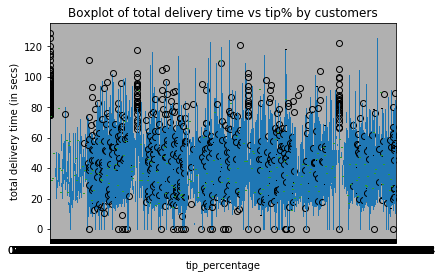

In [28]:
ax = data[['tip_percentage', 'deliverytime_mins']][data.deliverytime_mins<130].boxplot(column='deliverytime_mins', by='tip_percentage')
ax.set_xlabel("tip_percentage")
ax.set_ylabel("total delivery time (in secs)")
plt.title("Boxplot of total delivery time vs tip% by customers")
plt.suptitle("")
plt.show()

# Customer Rating VS Delivery Time

/Users/gibranhasan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


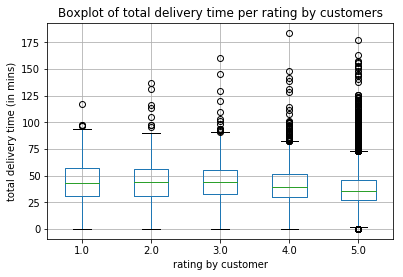

In [15]:
ax = data[['rating_by_customer', 'deliverytime_mins']][data.deliverytime_mins<200].boxplot(column='deliverytime_mins', by='rating_by_customer')
ax.set_xlabel("rating by customer")
ax.set_ylabel("total delivery time (in mins)")
plt.title("Boxplot of total delivery time per rating by customers")
plt.suptitle("")
plt.show()

# Delivery Distribution by Day of the week for Each City

In [9]:
data.groupby(['market', 'day_of_week']).size()

market       day_of_week
Chicago      0              3560
             1              2291
             2              2673
             3              3375
             4              3847
             5              3379
             6              3717
Phoenix      0              1110
             1               743
             2               688
             3              1066
             4              1149
             5               904
             6              1006
San Antonio  0               152
             1                92
             2               195
             3               300
             4               300
             5               118
             6                86
dtype: int64

In [62]:
delivery_days = pd.crosstab(data['day_of_week'], data['market']).sort_index()
delivery_days

market,Chicago,Phoenix,San Antonio
day_of_week,,,
0,3560,1110,152
1,2291,743,92
2,2673,688,195
3,3375,1066,300
4,3847,1149,300
5,3379,904,118
6,3717,1006,86


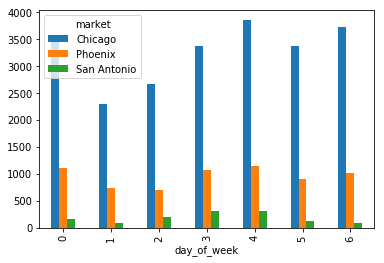

In [63]:
delivery_days.plot.bar()

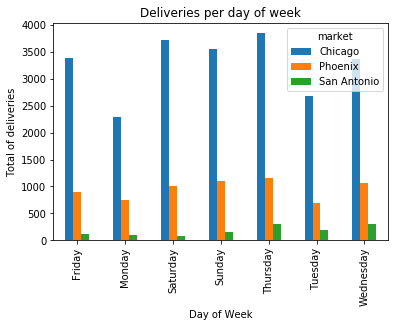

In [64]:
delivery_days = pd.crosstab(data['day_of_week'].replace({
            0: 'Sunday',
            1: 'Monday',
            2: 'Tuesday',
            3: 'Wednesday',
            4: 'Thursday',
            5: 'Friday',
            6: 'Saturday'
        }), data['market'])

ax = delivery_days.plot.bar()
ax.set_xlabel("Day of Week")
ax.set_ylabel("Total of deliveries")
plt.title("Deliveries per day of week")
plt.show()

# Time Analysis

In [12]:
data.time

AttributeError: 'DataFrame' object has no attribute 'time'

In [6]:
data.job_date_local_time.dt.hour

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         1
9         1
10        1
11        1
12        2
13        3
14        4
15        6
16        6
17        7
18        7
19        8
20        8
21        8
22        8
23        8
24        8
25        8
26        9
27        9
28        9
29        9
         ..
30721    19
30722    19
30723    19
30724    19
30725    19
30726    19
30727    20
30728    20
30729    20
30730    20
30731    20
30732    20
30733    20
30734    20
30735    20
30736    20
30737    20
30738    21
30739    21
30740    21
30741    21
30742    21
30743    21
30744    21
30745    21
30746    22
30747    22
30748    22
30749    22
30750    22
Name: job_date_local_time, Length: 30751, dtype: int64

In [7]:
data.groupby(['time']).size().reset_index(name='counttimes').sort_values(by='counttimes', ascending=False)


KeyError: 'time'

In [15]:
data[['time', 'counttimes']].sort_values(by='counttimes', ascending=False)

KeyError: "['time' 'counttimes'] not in index"

In [87]:
data[['time', 'counttimes']].sort_values(by='counttimes').tail(220)

,time,counttimes
928,2018-01-06 19:52:00,44.0
946,2018-01-06 20:14:00,44.0
900,2018-01-06 19:28:00,44.0
563,2018-01-06 11:22:00,44.0
507,2018-01-06 07:58:00,44.0
840,2018-01-06 18:33:00,44.0
888,2018-01-06 19:20:00,44.0
954,2018-01-06 20:19:00,45.0
1054,2018-01-06 22:48:00,45.0
593,2018-01-06 11:53:00,45.0


In [29]:
#Time

In [27]:
data['time'] = data.job_date_local_time.apply(lambda x: x.time())
data['time']

0        00:07:00
1        00:12:00
2        00:16:00
3        00:17:00
4        00:24:00
5        00:31:00
6        00:32:00
7        00:55:00
8        01:05:00
9        01:18:00
10       01:50:00
11       01:54:00
12       02:22:00
13       03:11:00
14       04:00:00
15       06:32:00
16       06:55:00
17       07:12:00
18       07:35:00
19       08:00:00
20       08:10:00
21       08:11:00
22       08:21:00
23       08:32:00
24       08:42:00
25       08:52:00
26       09:02:00
27       09:16:00
28       09:21:00
29       09:26:00
           ...   
30721    19:41:00
30722    19:47:00
30723    19:50:00
30724    19:55:00
30725    19:57:00
30726    19:57:00
30727    20:11:00
30728    20:12:00
30729    20:13:00
30730    20:18:00
30731    20:24:00
30732    20:24:00
30733    20:32:00
30734    20:35:00
30735    20:37:00
30736    20:54:00
30737    20:58:00
30738    21:00:00
30739    21:16:00
30740    21:24:00
30741    21:32:00
30742    21:38:00
30743    21:47:00
30744    21:49:00
30745    2

In [20]:
data['time'] = data.job_date_local_time.apply(lambda x: dt.datetime.combine(dt.date.today(), x.time()))

In [33]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Data columns (total 20 columns):
market                 30751 non-null object
job_date_local_time    30751 non-null datetime64[ns]
customer_price         30751 non-null float64
courier_price          30751 non-null float64
customer_uuid          30751 non-null object
courier_uuid           30751 non-null object
job_uuid               30751 non-null object
day_of_week            30751 non-null int64
purchase_fee           30751 non-null float64
rating_by_customer     29523 non-null float64
purchase_price         30751 non-null float64
purchase_tip           28654 non-null float64
credit                 30751 non-null float64
dropoff_km             30541 non-null float64
category               27867 non-null object
sub_category           27867 non-null object
total_delivery_time    30751 non-null int64
total                  30751 non-null float64
tip_percentage         28654 non-null float64
deliverytime_mins   

In [52]:
#Missing rows for dropoffkm column
missingdata_deliverymins=data[data["dropoff_km"].isnull()]
missingdata_deliverymins.describe()

,customer_price,courier_price,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,total_delivery_time,deliverytime_mins,tip_percentage,total
count,210.000000,210.000000,210.000000,210.000000,198.000000,210.000000,194.000000,210.000000,0.0,210.000000,210.000000,194.000000,210.000000
mean,8.296286,6.637000,3.038095,0.766524,4.843434,8.677429,1.960928,2.667762,NaN,2046.642857,34.110714,11.217932,8.435476
std,1.532156,1.225731,1.573852,1.121225,0.494367,12.666254,2.198035,3.518179,NaN,927.554949,15.459249,10.474630,15.373150
min,5.000000,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-5.600000
25%,7.000000,5.600000,2.000000,0.000000,5.000000,0.000000,0.000000,0.000000,NaN,1415.250000,23.587500,0.000000,-3.287500
50%,7.000000,5.600000,3.000000,0.000000,5.000000,0.000000,1.050000,0.000000,NaN,1912.500000,31.875000,10.001292,1.400000
75%,10.000000,8.000000,4.000000,1.280000,5.000000,14.200000,3.310000,7.000000,NaN,2543.000000,42.383333,15.006669,16.855000
max,10.000000,8.000000,6.000000,9.130000,5.000000,101.470000,10.460000,10.000000,NaN,4841.000000,80.683333,71.428571,112.600000


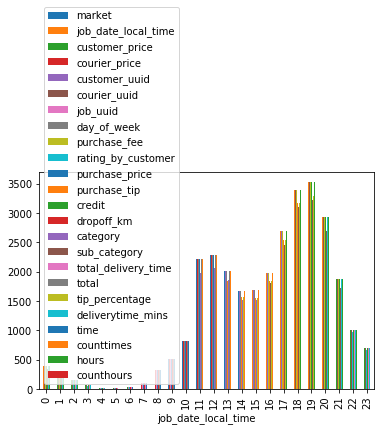

In [91]:
data.groupby(data.job_date_local_time.dt.hour).count().plot(kind="bar")

In [9]:
data.groupby(data.job_date_local_time.dt.hour).total.count().plot(kind="bar")
plt.title('Delivery Distribution per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Deliveries')

AttributeError: 'DataFrameGroupBy' object has no attribute 'total'

/Users/gibranhasan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[Text(0,0,'12 AM'),
 Text(0,0,'1AM'),
 Text(0,0,'2 AM'),
 Text(0,0,'3 AM'),
 Text(0,0,'4 AM'),
 Text(0,0,'5 AM'),
 Text(0,0,'6 AM'),
 Text(0,0,'7 AM'),
 Text(0,0,'8 AM'),
 Text(0,0,'9 AM'),
 Text(0,0,'10 AM'),
 Text(0,0,'11 AM'),
 Text(0,0,'12 PM'),
 Text(0,0,'1 PM'),
 Text(0,0,'2 PM'),
 Text(0,0,'3 PM'),
 Text(0,0,'4 PM'),
 Text(0,0,'5 PM'),
 Text(0,0,'6 PM'),
 Text(0,0,'7 PM'),
 Text(0,0,'8 PM'),
 Text(0,0,'9 PM'),
 Text(0,0,'10 PM'),
 Text(0,0,'11 PM')]

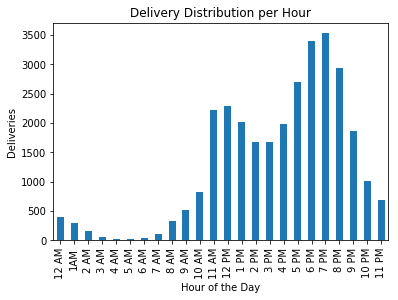

In [102]:
data.groupby(data.job_date_local_time.dt.hour).total.count().plot(kind="bar")
plt.title('Delivery Distribution per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Deliveries')
times_names = ['12 AM', '1AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM','10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'] 
ax = plt.subplot(1,1,1)
ax.set_xticks(range(len(times_names)))
ax.set_xticklabels(times_names)
ax.set_xticklabels(times_names, rotation=90)
              

In [35]:
#need to make sure total is created for this to run and job_date_local_time is a datetime object(check using data.info())
data.groupby(data.job_date_local_time.dt.hour).total.count()

job_date_local_time
0      391
1      290
2      160
3       63
4       21
5       23
6       33
7      111
8      329
9      512
10     825
11    2217
12    2289
13    2013
14    1680
15    1683
16    1981
17    2695
18    3391
19    3528
20    2938
21    1871
22    1014
23     693
Name: total, dtype: int64

In [25]:
data.head(4)

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,category,sub_category,total_delivery_time,total,tip_percentage,deliverytime_mins
0,Chicago,2015-04-01 00:07:00,5.00,4.0,180DB394-92B1-48FA-A41B-032E2D7705F7,dc024490-dbb3-4f1f-ad93-bdf1653b9d48,7ee723fe-7557-42c0-bdd6-691bac632536,3,1.09,5.0,12.07,0.00,0.0,0.479473,NaN,NaN,1608,14.16,0.00000,26.800000
1,Chicago,2015-04-01 00:12:00,7.50,6.0,8225C4A7-41F3-41D2-BEAE-03322440CD06,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,9fc78f6f-66e5-4378-81d6-87b93bfed891,3,1.36,5.0,15.09,4.79,0.0,2.130467,Restaurant,Fast Food,1420,17.95,20.00000,23.666667
2,Chicago,2015-04-01 00:16:00,10.75,8.6,A57C5927-F608-44FA-B466-E5878454BD31,52639991-2e87-4ad6-a903-ede7d00afbc9,1674079d-2a23-4c2f-8aab-ddb274fce53e,3,2.89,5.0,32.09,4.57,0.0,3.985329,Restaurant,Bakery,2698,37.13,9.99344,44.966667
3,Chicago,2015-04-01 00:17:00,6.00,4.8,6551598E-8771-43A3-97E3-18F1EC473D63,19abeb3f-0f1e-4813-9837-6ec06e5b34ab,17fbcc32-0f03-4af8-b46d-04e8b888e083,3,3.79,5.0,42.09,0.00,0.0,1.291798,Restaurant,Pub,5432,47.08,0.00000,90.533333


In [29]:
wd_counts = data['job_date_local_time'].dt.weekday_name.value_counts()
wd_counts

Thursday     5296
Sunday       4822
Saturday     4809
Wednesday    4741
Friday       4401
Tuesday      3556
Monday       3126
Name: job_date_local_time, dtype: int64

In [61]:
m_counts = data['job_date_local_time'].dt.hour.value_counts().sort_index()
m_counts

0      391
1      290
2      160
3       63
4       21
5       23
6       33
7      111
8      329
9      512
10     825
11    2217
12    2289
13    2013
14    1680
15    1683
16    1981
17    2695
18    3391
19    3528
20    2938
21    1871
22    1014
23     693
Name: job_date_local_time, dtype: int64

In [60]:
m_counts.sort_index()

0      391
1      290
2      160
3       63
4       21
5       23
6       33
7      111
8      329
9      512
10     825
11    2217
12    2289
13    2013
14    1680
15    1683
16    1981
17    2695
18    3391
19    3528
20    2938
21    1871
22    1014
23     693
Name: job_date_local_time, dtype: int64

In [57]:
m_counts.index.sort_values()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

In [107]:
data.pivot_table('total', index='day_of_week', columns='market') # shows average total $ order per day of week

market,Chicago,Phoenix,San Antonio
day_of_week,,,
0,24.162017,12.684712,9.209474
1,25.653658,18.847389,18.555217
2,21.910288,17.197137,9.919385
3,21.146519,15.408696,8.048000
4,20.325381,14.396101,8.543400
5,21.028662,14.299701,14.139492
6,26.458286,14.793996,12.971047


In [109]:
data.pivot_table(index='day_of_week', columns='market',
                    aggfunc={'total':sum})

total                      
market        Chicago   Phoenix San Antonio
day_of_week                                
0            86016.78  14080.03     1399.84
1            58772.53  14003.61     1707.08
2            58566.20  11831.63     1934.28
3            71369.50  16425.67     2414.40
4            78191.74  16541.12     2563.02
5            71055.85  12926.93     1668.46
6            98345.45  14882.76     1115.51

In [113]:
data.pivot_table(index='day_of_week', columns='market',
                    aggfunc={'total':'count'})

total                    
market      Chicago Phoenix San Antonio
day_of_week                            
0              3560    1110         152
1              2291     743          92
2              2673     688         195
3              3375    1066         300
4              3847    1149         300
5              3379     904         118
6              3717    1006          86

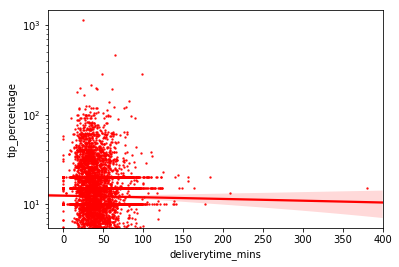

In [118]:
ax=sns.regplot('deliverytime_mins', 'tip_percentage', data=data, marker='o', color='red', scatter_kws={'s':2})
ax.set_yscale('log')  


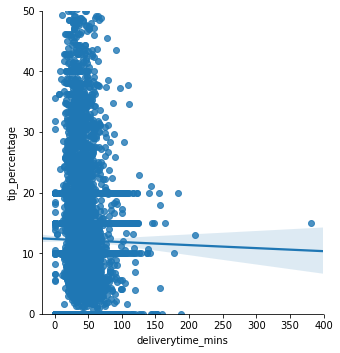

In [129]:
g = sns.lmplot('deliverytime_mins','tip_percentage',data,sharex=False,sharey=False)
g.set(ylim=(0, 50))


In [7]:
data.query('deliverytime_mins>200')

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,category,sub_category,total_delivery_time,deliverytime_mins
9298,Chicago,2015-04-14 22:11:00,5.0,4.0,32cc493e-599a-43d0-87b5-a060b59c3e91,3da24028-2d04-463d-8ae9-f1ac723a1ef8,d313177a-31f6-4ca5-b7ad-3de171c89148,2,0.70,NaN,7.83,NaN,5.0,0.601010,Special,Special,77375,1289.583333
9618,Chicago,2015-04-15 15:34:00,5.5,4.4,E6124F77-7DE6-4C58-AA4E-22694FC2A901,7b25f4a7-52d1-445a-9941-54a6539f5056,ac000b85-fddf-4c49-b35a-4ae46ad7284d,3,3.33,5.0,36.97,6.00,NaN,1.054069,Shop,Grocery Store,12533,208.883333
11701,Chicago,2015-04-17 20:43:00,8.5,6.8,9cae4220-ae75-4598-96ae-e3e606011078,0047f11d-c3e6-42b3-b9bd-4b80525e2514,ea95447e-094b-4190-8ffb-efccb41bbbcb,5,1.08,5.0,12.05,3.24,NaN,2.707335,NaN,NaN,22827,380.450000


In [15]:
data['tip_percentage'].describe()

count    28654.000000
mean        12.163977
std         12.521524
min          0.000000
25%          9.963520
50%         10.019907
75%         15.019569
max       1137.009665
Name: tip_percentage, dtype: float64

In [24]:
data.query('market=="Chicago" & tip_percentage>20')  

#('ilevel_0=="bar" &  ilevel_1 > B')

,market,job_date_local_time,customer_price,courier_price,customer_uuid,courier_uuid,job_uuid,day_of_week,purchase_fee,rating_by_customer,purchase_price,purchase_tip,credit,dropoff_km,category,sub_category,total_delivery_time,deliverytime_mins,tip_percentage
7,Chicago,2015-04-01 00:55:00,21.00,16.8,6cddb8a5-8760-4348-8797-83ec80f546f0,e02e8ea0-3aa9-4bf6-a3c8-95c6cada79b0,17ad9809-cc4e-4b81-a3dd-610ed855051b,3,3.51,5.0,39.03,12.71,10.00,5.684492,Restaurant,Pizza,3187,53.116667,20.003148
37,Chicago,2015-04-01 10:05:00,6.00,4.8,C3510D90-815B-4E9C-89E3-5BF4B6BBF714,c93872cc-d08d-4e64-ac86-c4cf8b6a45fd,8b2cc6c5-9c32-4827-ad64-52a08c937f58,3,2.09,5.0,23.24,6.27,NaN,1.287496,NaN,NaN,3851,64.183333,20.012767
53,Chicago,2015-04-01 11:06:00,5.00,4.0,9FEAC6D5-4249-4E87-A248-2D32B0F37FA0,9bff6dc3-96ff-4287-b305-a2cc0e10a732,45325038-435e-4596-96fc-8a88e5483e6b,3,2.01,5.0,22.28,5.86,NaN,0.596804,Restaurant,Deli,2088,34.800000,20.006828
57,Chicago,2015-04-01 11:22:00,11.75,9.4,FA6E2A92-2123-4374-8335-03C55E3DD79C,dea2150f-e3d4-48b8-a0ed-8dcf7ecba481,478e8e5d-2ec3-440b-ab77-f919959378f2,3,1.16,5.0,12.87,5.16,NaN,4.522211,NaN,NaN,2161,36.016667,20.015516
102,Chicago,2015-04-01 12:31:00,26.00,20.8,032c32d8-b9af-478e-b35c-27e06e992513,9bff6dc3-96ff-4287-b305-a2cc0e10a732,7643892c-8020-45c9-a33f-55d9e4279416,3,0.00,5.0,0.00,10.00,26.00,15.535538,Restaurant,Fast Food,3452,57.533333,38.461538
120,Chicago,2015-04-01 12:59:00,6.50,5.2,C9EA2782-DE68-4C75-8257-411095378AC0,e562c802-ae70-4545-a8c4-231ff0e6d8ff,c6ddc177-48cd-404a-98b5-3b5e34b1aac6,3,0.83,5.0,9.25,3.32,6.50,1.562930,Restaurant,Mexican,1100,18.333333,20.024125
148,Chicago,2015-04-01 15:03:00,5.00,4.0,8EB3D7F4-28F4-4A77-AE38-E51B0D303740,e84a3cd1-d56e-41e9-a8c5-1319fb15b1c9,47c5a1a6-0cc0-4413-bb84-64b4cfdbbe0a,3,1.19,5.0,13.24,3.89,NaN,0.342403,Restaurant,Mexican,1851,30.850000,20.020587
154,Chicago,2015-04-01 15:26:00,6.00,4.8,df59a78b-5a79-47db-8730-dfe0b5f0265b,dea2150f-e3d4-48b8-a0ed-8dcf7ecba481,eb1cf129-3ca1-4c27-a1b0-3270dc28bbe4,3,1.54,4.0,17.08,5.00,NaN,1.409496,Restaurant,Mexican,2200,36.666667,20.308692
157,Chicago,2015-04-01 15:37:00,5.25,4.2,41B66694-D30D-4D76-8391-E84EA2676D8C,740e349d-92d0-4da2-84b7-11d10120f5fb,69acc646-7f91-4540-96b2-c80bf4f8cdaa,3,1.51,5.0,16.78,4.71,NaN,0.949970,Restaurant,Burger,1632,27.200000,20.008496
158,Chicago,2015-04-01 15:41:00,7.25,5.8,B6FF7EF4-C54E-45B0-AE1A-F7EB30D48C48,396717ab-4dec-415a-9330-a8ea86abf47c,6f4fc80a-27bd-4a9c-84c9-61ab29d7eabb,3,1.08,5.0,12.00,4.07,NaN,2.084466,NaN,NaN,1431,23.850000,20.019675


In [29]:
data.query('market=="Chicago" & tip_percentage>20').count()

market                 2100
job_date_local_time    2100
customer_price         2100
courier_price          2100
customer_uuid          2100
courier_uuid           2100
job_uuid               2100
day_of_week            2100
purchase_fee           2100
rating_by_customer     2100
purchase_price         2100
purchase_tip           2100
credit                  666
dropoff_km             2077
category               1910
sub_category           1910
total_delivery_time    2100
deliverytime_mins      2100
tip_percentage         2100
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Data columns (total 19 columns):
market                 30751 non-null object
job_date_local_time    30751 non-null datetime64[ns]
customer_price         30751 non-null float64
courier_price          30751 non-null float64
customer_uuid          30751 non-null object
courier_uuid           30751 non-null object
job_uuid               30751 non-null object
day_of_week            30751 non-null int64
purchase_fee           30751 non-null float64
rating_by_customer     29523 non-null float64
purchase_price         30751 non-null float64
purchase_tip           28654 non-null float64
credit                 10631 non-null float64
dropoff_km             30541 non-null float64
category               27867 non-null object
sub_category           27867 non-null object
total_delivery_time    30751 non-null int64
deliverytime_mins      30751 non-null float64
tip_percentage         28654 non-null float64
dtypes: datetime64[n